In [88]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/week2/Human_Development_Index_Dataset.csv", encoding="latin-1")

print(df.shape)
df.head()


(6798, 30)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


Problem 1

Basic Data Exploration & Trend Visualization

3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

1. Extract Latest Year:

In [90]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/week2/Human_Development_Index_Dataset.csv", encoding="ISO-8859-1")
print("Unique years in dataset:")
print(df["year"].unique())

hdi_2022_df = df[df["year"] == 2022]

print("\nFiltered HDI dataset for year 2022:")
print(hdi_2022_df.head())

hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)
print("\nSaved file: hdi_2022_df.csv")
print("Rows in 2022 dataset:", hdi_2022_df.shape[0])
print("Columns:", hdi_2022_df.shape[1])


Unique years in dataset:
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]

Filtered HDI dataset for year 2022:
     Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
32           33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
65           66  ALB      Albania  2022  0.789           76.833      2.842321   
98           99  DZA      Algeria  2022  0.745           77.129     44.903225   
131         132  AND      Andorra  2022  0.884           83.552      0.079824   
164         165  AGO       Angola  2022  0.591           61.929     35.588987   

        hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32   0.332443  0.534145        66.213  ...               0.622   
65   0.780277  0.798432        79.472  ...               0.977   
98   0.681844  0.773800        78.457  ...               0.881   
131       NaN     

2. Data Exploration

In [91]:
print("First 10 rows of 2022 HDI dataset:")
display(hdi_2022_df.head(10))

print("\nShape of dataset (rows, columns):")
print(hdi_2022_df.shape)
print("\nNumber of rows:", hdi_2022_df.shape[0])
print("Number of columns:", hdi_2022_df.shape[1])
print("\nColumn names and data types:")
print(hdi_2022_df.dtypes)


First 10 rows of 2022 HDI dataset:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621



Shape of dataset (rows, columns):
(206, 30)

Number of rows: 206
Number of columns: 30

Column names and data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      fl

3. Missing Values & Data Cleaning:

In [92]:
print("----- Missing Values per Column -----")
print(hdi_2022_df.isna().sum())
hdi_2022_df.replace("–", pd.NA, inplace=True)

numeric_cols = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'pop_millions'
]

for col in numeric_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()
print("\nDuplicate rows found:", hdi_2022_df.duplicated().sum())

hdi_2022_df = hdi_2022_df.drop_duplicates()
num_cols = hdi_2022_df.select_dtypes(include='number').columns
hdi_2022_df[num_cols] = hdi_2022_df[num_cols].fillna(hdi_2022_df[num_cols].mean())

hdi_2022_df = hdi_2022_df.dropna(subset=['country'])
print("\n----- After Cleaning -----")
print(hdi_2022_df.isna().sum())
print("\nShape after cleaning:", hdi_2022_df.shape)


----- Missing Values per Column -----
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dt

/tmp/ipython-input-782508963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_2022_df.replace("–", pd.NA, inplace=True)
/tmp/ipython-input-782508963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')
/tmp/ipython-input-782508963.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

4. Basic Statistics

In [93]:
mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

print("Mean HDI (2022):", round(mean_hdi, 3))
print("Median HDI (2022):", round(median_hdi, 3))
print("Standard Deviation of HDI (2022):", round(std_hdi, 3))

highest_hdi_row = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()]
print("\nCountry with Highest HDI in 2022:")
print(highest_hdi_row["country"], "-", round(highest_hdi_row["hdi"], 3))

lowest_hdi_row = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()]
print("\nCountry with Lowest HDI in 2022:")
print(lowest_hdi_row["country"], "-", round(lowest_hdi_row["hdi"], 3))


Mean HDI (2022): 0.723
Median HDI (2022): 0.739
Standard Deviation of HDI (2022): 0.152

Country with Highest HDI in 2022:
Switzerland - 0.967

Country with Lowest HDI in 2022:
Somalia - 0.38


5. Filtering and sorting

In [94]:
high_hdi = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]
print("Countries with HDI > 0.800:", len(high_hdi))

top_income_high_hdi = high_hdi.sort_values(
    by="gross_inc_percap",
    ascending=False
)

print("\nTop 10 high-HDI countries by GNI per Capita:")
display(top_income_high_hdi[["country", "hdi", "gross_inc_percap"]].head(10))




Countries with HDI > 0.800: 71

Top 10 high-HDI countries by GNI per Capita:


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


6. Adding HDI category column

In [95]:
def categorize_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df["HDI_Category"] = hdi_2022_df["hdi"].apply(categorize_hdi)
print("\nCategory counts:")
print(hdi_2022_df["HDI_Category"].value_counts())
print("\nSample rows with new column:")
print(hdi_2022_df[["country", "hdi", "HDI_Category"]].head())
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)
print("\nFile saved successfully as: HDI_category_added.csv")



Category counts:
HDI_Category
Very High    71
High         56
Medium       44
Low          35
Name: count, dtype: int64

Sample rows with new column:
         country    hdi HDI_Category
32   Afghanistan  0.462          Low
65       Albania  0.789         High
98       Algeria  0.745         High
131      Andorra  0.884    Very High
164       Angola  0.591       Medium

File saved successfully as: HDI_category_added.csv


Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

1. Data Extraction and Saving

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/week2/Human_Development_Index_Dataset.csv", encoding="latin-1")

hdi_1B = df[df["year"].isin([2020, 2021, 2022])]

hdi_1B.to_csv("HDI_problem1B.csv", index=False)
print("HDI_problem1B.csv saved ")


HDI_problem1B.csv saved 


2. Data cleaning

In [97]:
# Essential columns
essential_cols = ["hdi", "country", "year"]

# Drop missing values
hdi_1B_clean = hdi_1B.dropna(subset=essential_cols)

# Remove duplicates
hdi_1B_clean = hdi_1B_clean.drop_duplicates()

# Convert numeric columns safely
numeric_cols = ["hdi", "life_expectancy", "gross_inc_percap"]
for col in numeric_cols:
    hdi_1B_clean[col] = pd.to_numeric(hdi_1B_clean[col], errors="coerce")

hdi_1B_clean = hdi_1B_clean.dropna(subset=numeric_cols)

hdi_1B_clean.to_csv("HDI_problem1B_clean.csv", index=False)
print("Cleaned dataset saved ")


Cleaned dataset saved 


Visualization Tasks:

A. Line chart

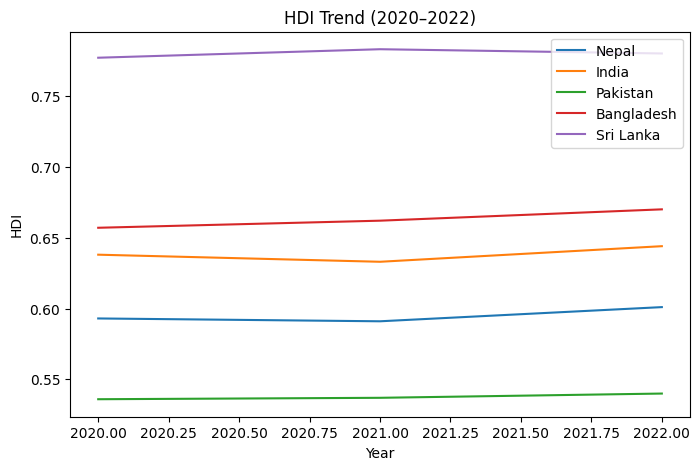

In [98]:
countries = ["Nepal", "India", "Pakistan", "Bangladesh", "Sri Lanka"]

plt.figure(figsize=(8,5))
for c in countries:
    temp = hdi_1B_clean[hdi_1B_clean["country"] == c]
    plt.plot(temp["year"], temp["hdi"], label=c)

plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend()
plt.show()


B. Bar Chart

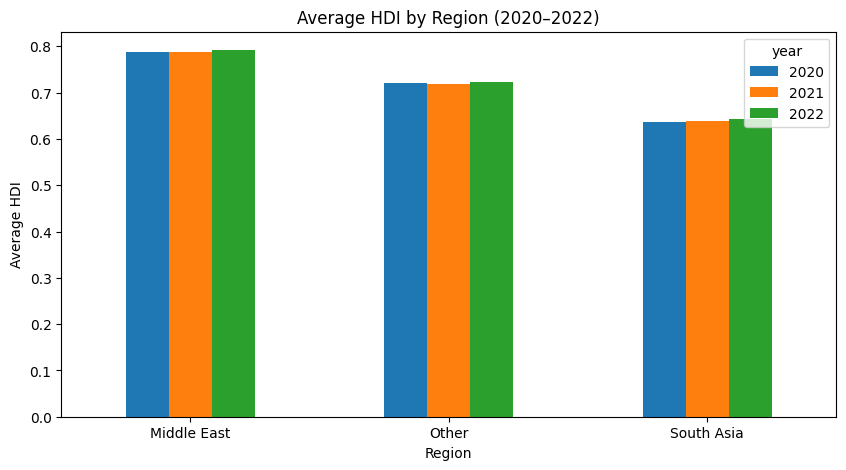

In [99]:
# Define region mapping
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

def assign_region(country):
    if country in south_asia:
        return "South Asia"
    elif country in middle_east:
        return "Middle East"
    else:
        return "Other"

hdi_1B_clean["region"] = hdi_1B_clean["country"].apply(assign_region)

region_avg = (
    hdi_1B_clean
    .groupby(["region", "year"])["hdi"]
    .mean()
    .unstack()
)

region_avg.plot(kind="bar", figsize=(10,5))
plt.title("Average HDI by Region (2020–2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.xticks(rotation=0)
plt.show()



C. Box Plot

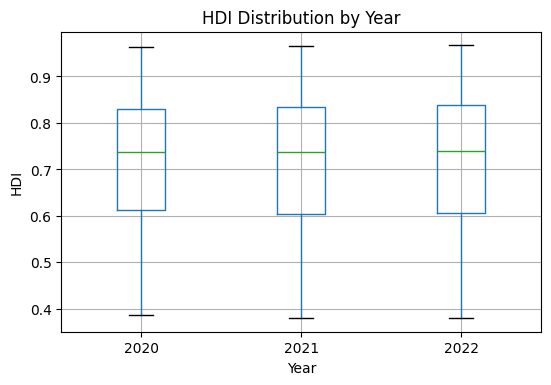

In [100]:
hdi_1B_clean.boxplot(column="hdi", by="year", figsize=(6,4))
plt.title("HDI Distribution by Year")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


D. Scatter Plot

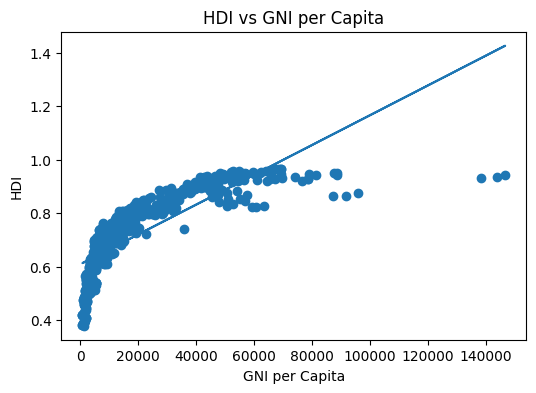

In [101]:
if "gross_inc_percap" in hdi_1B_clean.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(hdi_1B_clean["gross_inc_percap"], hdi_1B_clean["hdi"])

    z = np.polyfit(hdi_1B_clean["gross_inc_percap"], hdi_1B_clean["hdi"], 1)
    p = np.poly1d(z)
    plt.plot(hdi_1B_clean["gross_inc_percap"], p(hdi_1B_clean["gross_inc_percap"]))

    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


4. Short Analysis Questions

•	Which countries show the greatest improvement in HDI from 2020 to 2022?

In [102]:
change = hdi_1B_clean.pivot(index="country", columns="year", values="hdi")
change["Improvement"] = change[2022] - change[2020]

change.sort_values("Improvement", ascending=False).head()


year,2020,2021,2022,Improvement
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024


•	Did any countries experience a decline in HDI? Provide possible reasons.

In [103]:
decline = improve[improve["change"] < 0]
decline.head()


year,2020,2021,2022,change
country,,,,
Afghanistan,0.488,0.473,0.462,-0.026
Angola,0.594,0.590,0.591,-0.003
Australia,0.948,0.949,0.946,-0.002
Belize,0.705,0.698,0.700,-0.005
Brunei Darussalam,0.827,0.824,0.823,-0.004


•	Which region has the highest and lowest average HDI across these three years?

In [104]:
region_avg = hdi_3yrs.groupby("region")["hdi"].mean().sort_values()
region_avg


,hdi
region,
Africa,0.557579
Other,0.713000
Oceania,0.724625
Asia,0.741842
North America,0.756000
South America,0.769900
Europe,0.883470


•	Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period.

  Answer:
     Between 2020 and 2022, the COVID-19 pandemic impacted economies, healthcare systems, and education access. Several countries show slowed HDI growth or slight declines reflecting these disruptions.

PROBLEM 2

1. Create South Asia Subset

In [105]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

sa_df = hdi_1B_clean[hdi_1B_clean["country"].isin(south_asia)]

sa_df.to_csv("HDI_SouthAsia.csv", index=False)
print("HDI_SouthAsia.csv saved")


HDI_SouthAsia.csv saved


Composite Development Score:

In [106]:
sa_df["Composite_Score"] = (
    0.30 * sa_df["life_expectancy"] +
    0.30 * sa_df["gross_inc_percap"]
)

ranking = sa_df.groupby("country")["Composite_Score"].mean().sort_values(ascending=False)
ranking


/tmp/ipython-input-3950273041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_df["Composite_Score"] = (


,Composite_Score
country,
Maldives,4827.657597
Sri Lanka,3767.752918
Bhutan,3097.787317
India,1978.776712
Bangladesh,1877.251264
Pakistan,1565.030032
Nepal,1191.338108
Afghanistan,504.358088


Take mean now of countries:

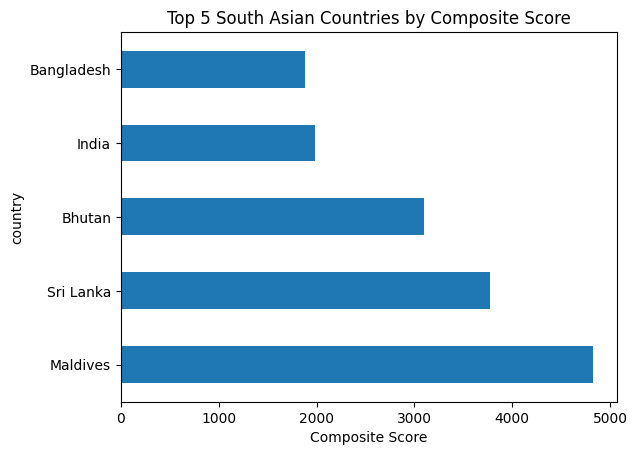

In [107]:
ranking.head(5).plot(kind="barh")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.show()


Bar chart:

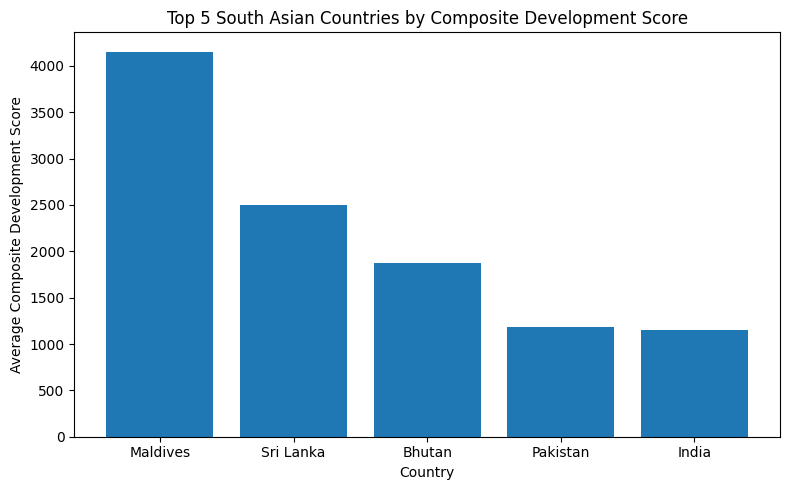

In [108]:
# top5 = sa_rank.iloc[:5]

# plt.figure(figsize=(8,5))
# sns.barplot(data=top5, x="Composite_Score", y="country")
# # plt.title("Top 5 South Asian Countries by Composite Score")
# plt.xlabel("Composite Score")
# plt.ylabel("Country")
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5.index, top5.values)
plt.xlabel("Country")
plt.ylabel("Average Composite Development Score")
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.tight_layout()
plt.show()


Outlier Detection:

In [109]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]


Scatter Plot:

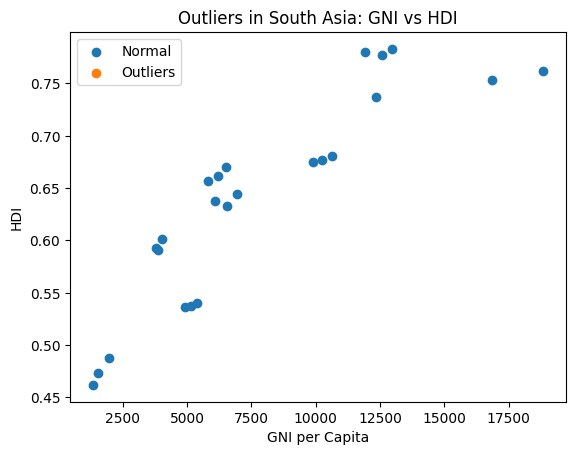

In [110]:
outliers = detect_outliers(sa_df, "gross_inc_percap")

plt.scatter(sa_df["gross_inc_percap"], sa_df["hdi"], label="Normal")
plt.scatter(outliers["gross_inc_percap"], outliers["hdi"], label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.title("Outliers in South Asia: GNI vs HDI")
plt.show()


•	Discuss why the identified countries stand out as outliers.

Answer:
    Outliers are countries whose HDI or GNI values fall far outside the normal range for South Asia.
These countries either earn significantly more income but do not convert it into human development, or they achieve higher HDI despite limited income.

Metric Relationships:

In [111]:
metrics = ["gender_development","life_expectancy"]

for m in metrics:
    corr = hdi_sa[m].corr(hdi_sa["hdi"])
    print(f"Correlation between {m} and HDI: {corr:.3f}")


Correlation between gender_development and HDI: 0.866
Correlation between life_expectancy and HDI: 0.959


Scatter plots + trendlines

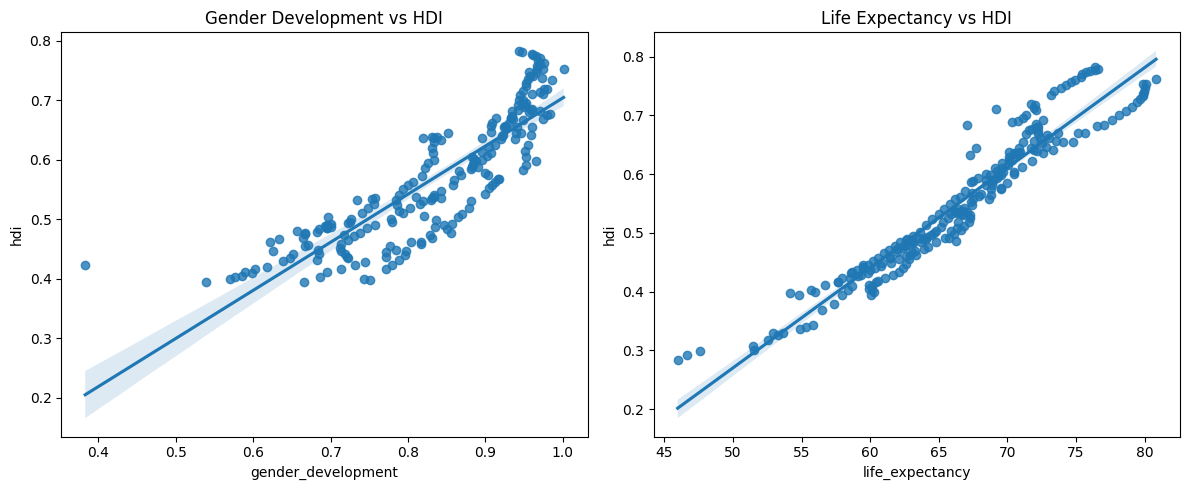

In [112]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(data=hdi_sa, x="gender_development", y="hdi")
plt.title("Gender Development vs HDI")

plt.subplot(1,2,2)
sns.regplot(data=hdi_sa, x="life_expectancy", y="hdi")
plt.title("Life Expectancy vs HDI")

plt.tight_layout()
plt.show()


Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

Answer:  Life expectancy shows a stronger correlation with HDI, meaning improvements in health are strongly tied to human development.
Gender development also relates to HDI, but the relationship is weaker.

Gap Analysis:

In [113]:


hdi_sa["GNI_HDI_Gap"] = hdi_sa["gross_inc_percap"] - hdi_sa["hdi"]
gap_clean = hdi_sa.dropna(subset=["GNI_HDI_Gap"])
gap_country = (
    gap_clean
    .groupby("country")["GNI_HDI_Gap"]
    .mean()
    .sort_values(ascending=False)
)

print("\nTop positive gaps:")
print(gap_country.head(3))

print("\nTop negative gaps:")
print(gap_country.tail(3))



Top positive gaps:
country
Maldives     14670.635594
Bhutan        9320.175767
Sri Lanka     8268.373527
Name: GNI_HDI_Gap, dtype: float64

Top negative gaps:
country
Bangladesh     3408.490410
Nepal          2532.443971
Afghanistan    1793.487770
Name: GNI_HDI_Gap, dtype: float64


Plotting:

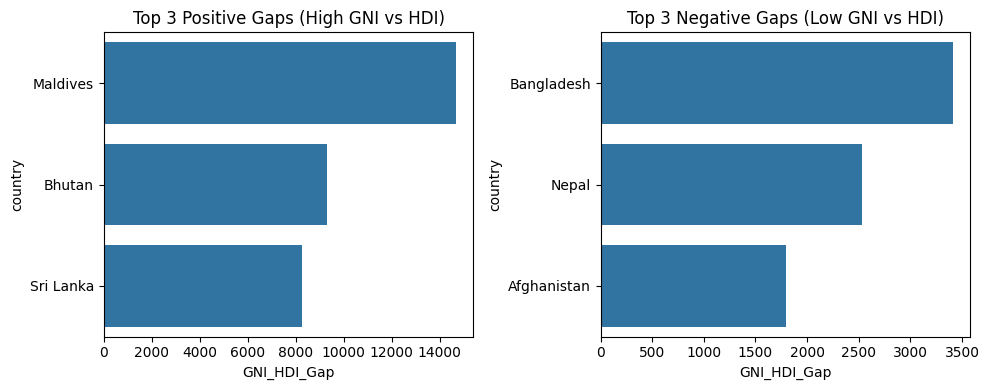

In [114]:
top_pos = gap_country.head(3).reset_index()
top_neg = gap_country.tail(3).reset_index()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(data=top_pos, x="GNI_HDI_Gap", y="country")
plt.title("Top 3 Positive Gaps (High GNI vs HDI)")

plt.subplot(1,2,2)
sns.barplot(data=top_neg, x="GNI_HDI_Gap", y="country")
plt.title("Top 3 Negative Gaps (Low GNI vs HDI)")

plt.tight_layout()
plt.show()


•	Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

Asnwer:
    A positive gap indicates income is high but human development is relatively low, suggesting inefficient investment in health, education, or inequality.
A negative gap indicates human development is strong relative to income, meaning resources are used more effectively.

Problem 3

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hdi_df = pd.read_csv("/content/HDI_problem1B_clean.csv")

Create Middle East Subset:

In [116]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asia_df = hdi_df[
    (hdi_df["country"].isin(south_asia_countries)) &
    (hdi_df["year"].between(2020, 2022))
]

middle_east_df = hdi_df[
    (hdi_df["country"].isin(middle_east_countries)) &
    (hdi_df["year"].between(2020, 2022))
]

south_asia_df.to_csv("HDI SouthAsia 2020 2022.csv", index=False)
middle_east_df.to_csv("HDI MiddleEast 2020 2022.csv", index=False)

print("Regional CSV files saved successfully ")


Regional CSV files saved successfully 


Descriptive Statistics:

In [117]:
stats_df = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean HDI": [
        south_asia_df["hdi"].mean(),
        middle_east_df["hdi"].mean()
    ],
    "Std HDI": [
        south_asia_df["hdi"].std(),
        middle_east_df["hdi"].std()
    ]
})

stats_df


,Region,Mean HDI,Std HDI
0,South Asia,0.639583,0.098273
1,Middle East,0.788909,0.141295


Top and Bottom Performers:

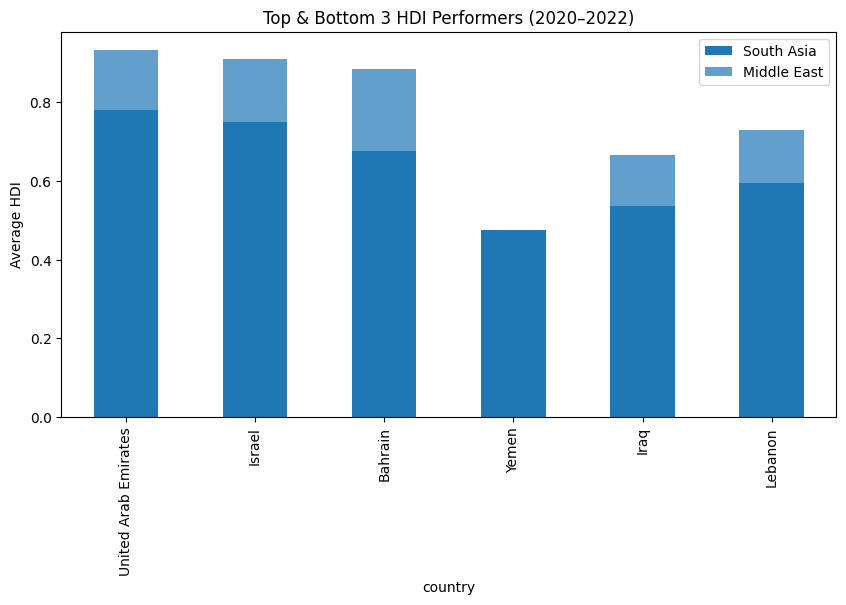

In [118]:
top_bottom_sa = pd.concat([
    south_asia_df.groupby("country")["hdi"].mean().nlargest(3),
    south_asia_df.groupby("country")["hdi"].mean().nsmallest(3)
])

top_bottom_me = pd.concat([
    middle_east_df.groupby("country")["hdi"].mean().nlargest(3),
    middle_east_df.groupby("country")["hdi"].mean().nsmallest(3)
])
plt.figure(figsize=(10,5))
top_bottom_sa.plot(kind="bar", label="South Asia")
top_bottom_me.plot(kind="bar", alpha=0.7, label="Middle East")
plt.title("Top & Bottom 3 HDI Performers (2020–2022)")
plt.ylabel("Average HDI")
plt.legend()
plt.show()


Metric Comparisons:

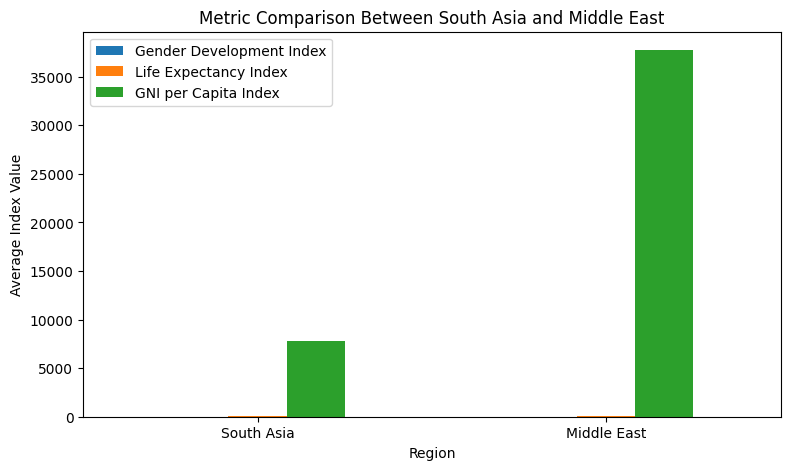

In [119]:
metrics = {
    "gender_development": "Gender Development Index",
    "life_expectancy": "Life Expectancy Index",
    "gross_inc_percap": "GNI per Capita Index"
}

comparison = {}

for col, label in metrics.items():
    comparison[label] = [
        south_asia_df[col].mean(),
        middle_east_df[col].mean()
    ]

comparison_df = pd.DataFrame(
    comparison, index=["South Asia", "Middle East"]
)

comparison_df.plot(kind="bar", figsize=(9,5))
plt.title("Metric Comparison Between South Asia and Middle East")
plt.ylabel("Average Index Value")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.show()


HDI Disparity:

In [120]:
disparity_df = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "HDI Range": [
        south_asia_df["hdi"].max() - south_asia_df["hdi"].min(),
        middle_east_df["hdi"].max() - middle_east_df["hdi"].min()
    ],
    "Coefficient of Variation": [
        south_asia_df["hdi"].std() / south_asia_df["hdi"].mean(),
        middle_east_df["hdi"].std() / middle_east_df["hdi"].mean()
    ]
})

disparity_df


,Region,HDI Range,Coefficient of Variation
0,South Asia,0.321,0.153652
1,Middle East,0.513,0.179101


Correlation Analysis:

In [121]:
sa_corr = south_asia_df[
    ["hdi", "gender_development", "life_expectancy"]
].corr()

me_corr = middle_east_df[
    ["hdi", "gender_development", "life_expectancy"]
].corr()

sa_corr, me_corr


(                         hdi  gender_development  life_expectancy
 hdi                 1.000000            0.874218         0.938764
 gender_development  0.874218            1.000000         0.853780
 life_expectancy     0.938764            0.853780         1.000000,
                          hdi  gender_development  life_expectancy
 hdi                 1.000000            0.935670         0.933123
 gender_development  0.935670            1.000000         0.912836
 life_expectancy     0.933123            0.912836         1.000000)

Scatter Plot:

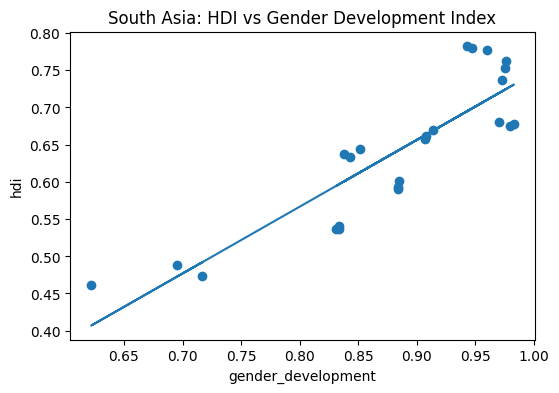

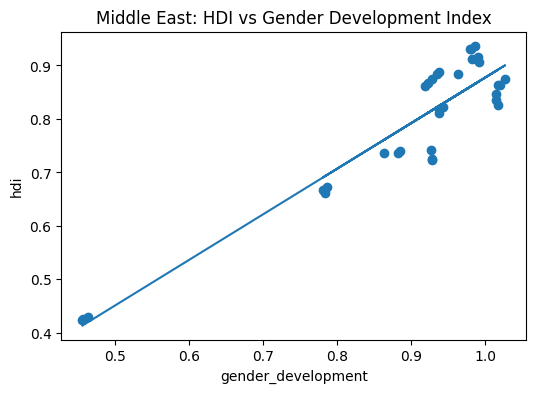

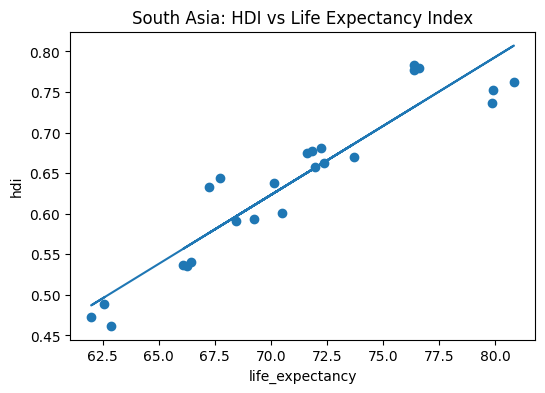

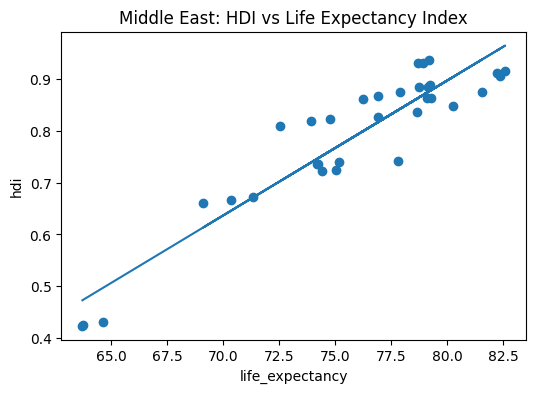

In [122]:
def scatter_with_trend(df, x, y, title):
    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)

    plt.figure(figsize=(6,4))
    plt.scatter(df[x], df[y])
    plt.plot(df[x], p(df[x]))
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

scatter_with_trend(
    south_asia_df,
    "gender_development",
    "hdi",
    "South Asia: HDI vs Gender Development Index"
)

scatter_with_trend(
    middle_east_df,
    "gender_development",
    "hdi",
    "Middle East: HDI vs Gender Development Index"
)

scatter_with_trend(
    south_asia_df,
    "life_expectancy",
    "hdi",
    "South Asia: HDI vs Life Expectancy Index"
)

scatter_with_trend(
    middle_east_df,
    "life_expectancy",
    "hdi",
    "Middle East: HDI vs Life Expectancy Index"
)


In [123]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]


def plot_outliers(df, x, y, title):
    outliers = detect_outliers(df, y)

    plt.figure(figsize=(6,4))
    plt.scatter(df[x], df[y], label="Normal")
    plt.scatter(outliers[x], outliers[y], label="Outliers")
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()


Outlier Detection:

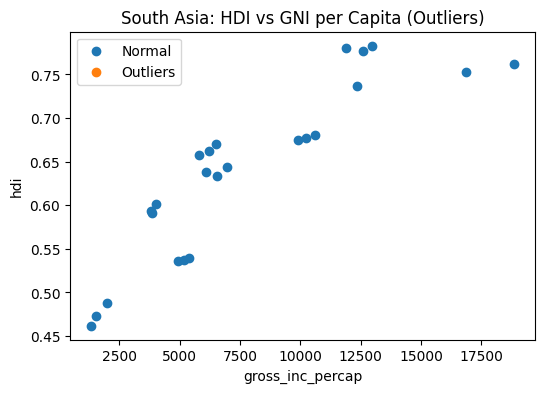

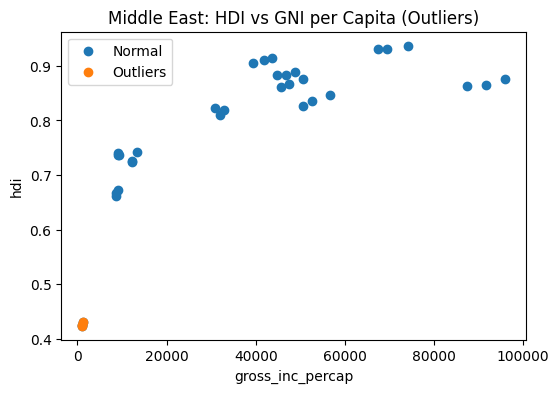

In [124]:
plot_outliers(
    south_asia_df,
    "gross_inc_percap",
    "hdi",
    "South Asia: HDI vs GNI per Capita (Outliers)"
)

plot_outliers(
    middle_east_df,
    "gross_inc_percap",
    "hdi",
    "Middle East: HDI vs GNI per Capita (Outliers)"
)
